In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [142]:
import plotly.express as px

In [143]:
df=pd.read_csv("Cheapestelectriccars-EVDatabase.csv")

In [144]:
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [145]:
df.shape

(180, 11)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [147]:
df.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

In [8]:
df.dropna()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
5,Nissan e-NV200 Evalia,Battery Electric Vehicle | 36 kWh,14.0 sec,123 km/h,165 km,218 Wh/km,170 km/h,Front Wheel Drive,7,"€43,433","£30,255"
6,Volkswagen ID.3 Pure Performance,Battery Electric Vehicle | 45 kWh,8.9 sec,160 km/h,275 km,164 Wh/km,260 km/h,Rear Wheel Drive,5,"€31,960","£27,120"
7,BMW iX3,Battery Electric Vehicle | 74 kWh,6.8 sec,180 km/h,385 km,192 Wh/km,520 km/h,Rear Wheel Drive,5,"€66,300","£58,850"
...,...,...,...,...,...,...,...,...,...,...,...
170,BMW i4 M50,Battery Electric Vehicle | 80.7 kWh,3.9 sec,225 km/h,450 km,179 Wh/km,630 km/h,All Wheel Drive,5,"€69,900","£63,905"
171,Volvo XC40 Recharge Twin Pure Electric,Battery Electric Vehicle | 75 kWh,4.9 sec,180 km/h,340 km,221 Wh/km,440 km/h,All Wheel Drive,5,"€59,250","£49,950"
172,Renault Megane E-Tech Electric,Battery Electric Vehicle | 60 kWh,8.0 sec,160 km/h,335 km,179 Wh/km,480 km/h,Front Wheel Drive,5,"€38,000","£32,500"
173,Peugeot e-Rifter Standard 50 kWh,Battery Electric Vehicle | 45 kWh,11.7 sec,135 km/h,200 km,225 Wh/km,270 km/h,Front Wheel Drive,7,"€37,590","£30,375"


In [148]:
df.duplicated().sum()

0

In [149]:
df.describe()

,NumberofSeats
count,180.000000
mean,5.166667
std,0.971666
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,7.000000


In [150]:
brand_count = df['Name'].value_counts()
fig = px.bar(x=brand_count.index, y=brand_count.values, labels={'x': 'Name', 'y': 'Count'},title="Distribution of Electric Car Brands")
fig.show()

In [151]:
import plotly.io as pio
fig = px.bar(df,x='Name',y = 'TopSpeed',title = 'Top speed cars',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [152]:
fig = px.bar(df,x='Efficiency',y = 'Name',title = 'Efficiency of car brands',labels = {'x':'Efficiency','y':'Car Brands'})
pio.show(fig)

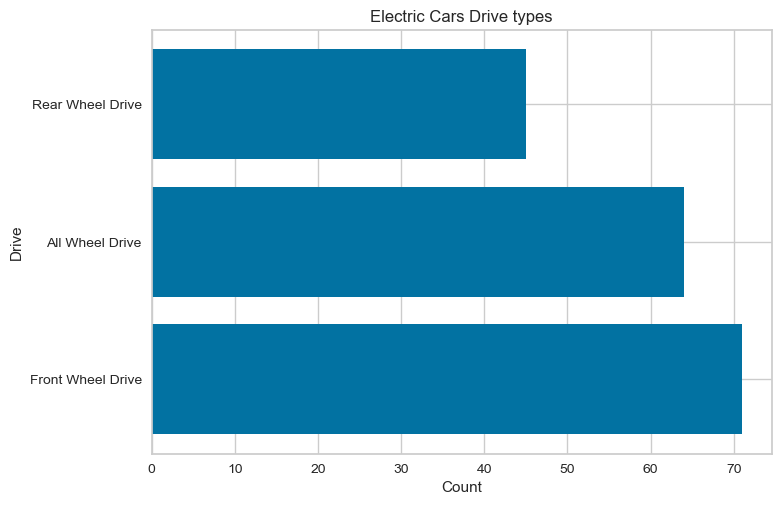

In [153]:
Drive_types = df['Drive'].value_counts()
plt.barh(Drive_types.index, powertrain_counts.values)
plt.xlabel('Count')
plt.ylabel('Drive')
plt.title('Electric Cars Drive types')
plt.show()

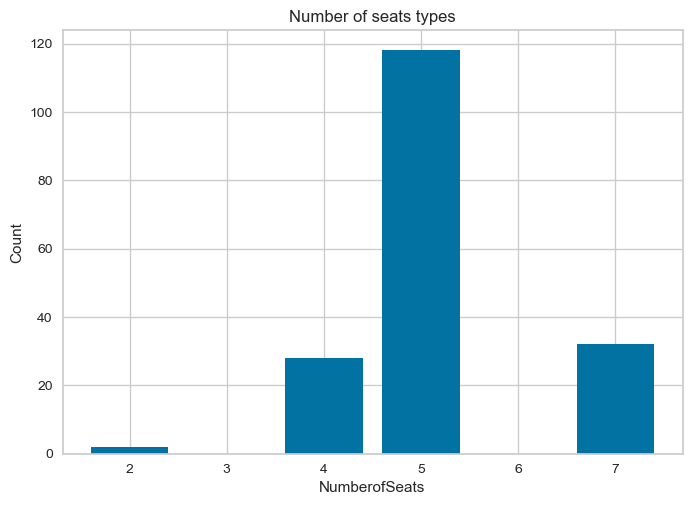

In [154]:
# Count the number of cars according to the number of seats
Number_of_seats = df['NumberofSeats'].value_counts()

# Create a bar plot of the plug type counts
plt.bar(Number_of_seats.index, plug_type_counts.values)

# Add labels and title
plt.xlabel('NumberofSeats')
plt.ylabel('Count')
plt.title('Number of seats types')

# Display the plot
plt.show()

In [155]:
le = LabelEncoder()
label = le.fit_transform(df['Subtitle'])
df.drop("Subtitle", axis=1, inplace=True)
df["Subtitle"] = label

In [156]:
le = LabelEncoder()
label = le.fit_transform(df['Acceleration'])
df.drop("Acceleration", axis=1, inplace=True)
df["Acceleration"] = label

In [157]:
le = LabelEncoder()
label = le.fit_transform(df['TopSpeed'])
df.drop("TopSpeed", axis=1, inplace=True)
df["TopSpeed"] = label

In [158]:
le = LabelEncoder()
label = le.fit_transform(df['Range'])
df.drop("Range", axis=1, inplace=True)
df["Range"] = label

In [159]:
le = LabelEncoder()
label = le.fit_transform(df['Efficiency'])
df.drop("Efficiency", axis=1, inplace=True)
df["Efficiency"] = label

In [160]:
le = LabelEncoder()
label = le.fit_transform(df['FastChargeSpeed'])
df.drop("FastChargeSpeed", axis=1, inplace=True)
df["FastChargeSpeed"] = label

In [161]:
le = LabelEncoder()
label = le.fit_transform(df['PriceinGermany'])
df.drop("PriceinGermany", axis=1, inplace=True)
df["PriceinGermany"] = label

In [162]:
le = LabelEncoder()
label = le.fit_transform(df['PriceinUK'])
df.drop("PriceinUK", axis=1, inplace=True)
df["PriceinUK"] = label

In [163]:
le = LabelEncoder()
label = le.fit_transform(df['Drive'])
df.drop("Drive", axis=1, inplace=True)
df["Drive"] = label

In [164]:
df.head()

,Name,NumberofSeats,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,PriceinGermany,PriceinUK,Drive
0,Opel Ampera-e,5,35,56,8,29,24,10,65,123,1
1,Renault Kangoo Maxi ZE 33,5,13,20,2,2,42,0,151,43,1
2,Nissan Leaf,5,15,62,6,10,15,12,26,16,1
3,Audi e-tron Sportback 55 quattro,5,63,44,17,36,66,45,151,112,0
4,Porsche Taycan Turbo S,4,59,18,29,39,56,61,13,7,0


In [165]:
df.dropna()

,Name,NumberofSeats,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,PriceinGermany,PriceinUK,Drive
0,Opel Ampera-e,5,35,56,8,29,24,10,65,123,1
1,Renault Kangoo Maxi ZE 33,5,13,20,2,2,42,0,151,43,1
2,Nissan Leaf,5,15,62,6,10,15,12,26,16,1
3,Audi e-tron Sportback 55 quattro,5,63,44,17,36,66,45,151,112,0
4,Porsche Taycan Turbo S,4,59,18,29,39,56,61,13,7,0
...,...,...,...,...,...,...,...,...,...,...,...
175,MG Marvel R,5,42,62,17,30,39,26,59,123,2
176,Tesla Model 3 Long Range Dual Motor,5,53,32,24,55,8,57,93,123,0
177,MG MG5 EV Long Range,5,33,60,15,30,19,21,151,19,1
178,Audi Q4 e-tron 45 quattro,5,54,54,14,38,47,34,87,123,0


Correlation Coefficient: 0.03


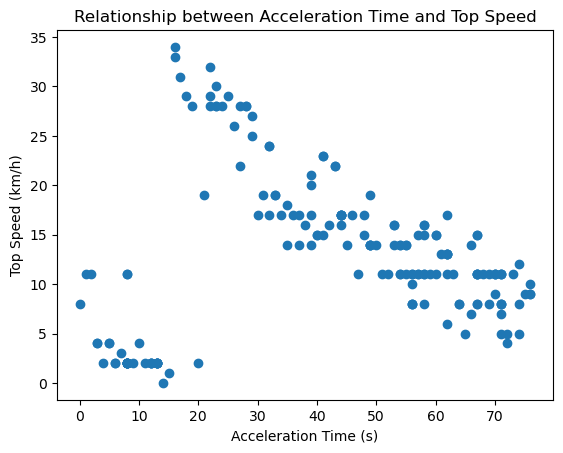

In [26]:
# Extract the relevant columns from the dataset
acceleration_time = df['Acceleration']
top_speed = df['TopSpeed']

# Create a scatterplot
plt.scatter(acceleration_time, top_speed)
plt.xlabel('Acceleration Time (s)')
plt.ylabel('Top Speed (km/h)')
plt.title('Relationship between Acceleration Time and Top Speed')

# Calculate the correlation coefficient
corr_coef = np.corrcoef(acceleration_time, top_speed)[0][1]
print('Correlation Coefficient: {:.2f}'.format(corr_coef))

# Show the plot
plt.show()

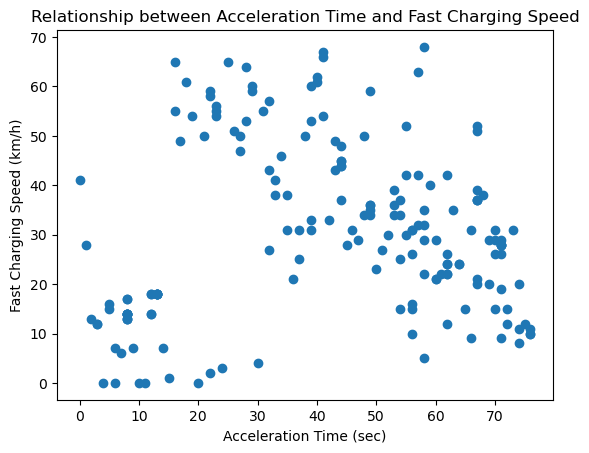

In [27]:
# Scatter plot of Acceleration Time vs Fast Charging Speed
plt.scatter(df['Acceleration'], df['FastChargeSpeed'])
plt.xlabel('Acceleration Time (sec)')
plt.ylabel('Fast Charging Speed (km/h)')
plt.title('Relationship between Acceleration Time and Fast Charging Speed')
plt.show()

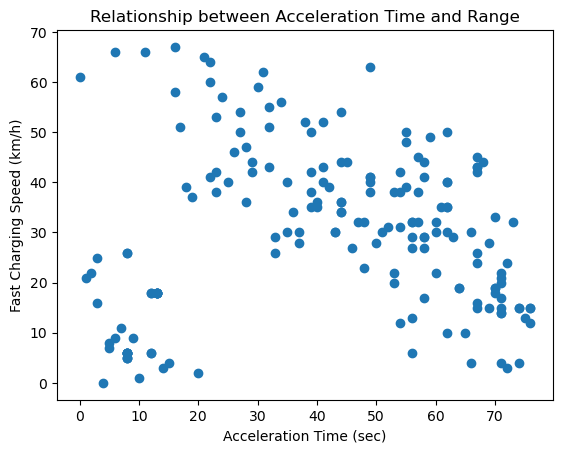

In [28]:
# Scatter plot of Acceleration Time vs Range
plt.scatter(df['Acceleration'], df['Range'])
plt.xlabel('Acceleration Time (sec)')
plt.ylabel('Fast Charging Speed (km/h)')
plt.title('Relationship between Acceleration Time and Range')
plt.show()

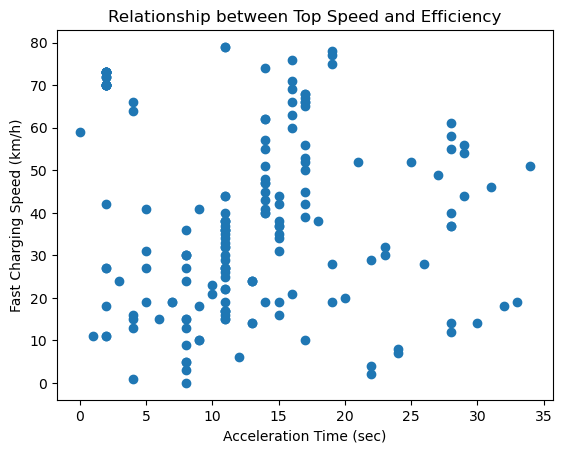

In [29]:
# Scatter plot of Top Speed vs Efficience
plt.scatter(df['TopSpeed'], df['Efficiency'])
plt.xlabel('Acceleration Time (sec)')
plt.ylabel('Fast Charging Speed (km/h)')
plt.title('Relationship between Top Speed and Efficiency')
plt.show()

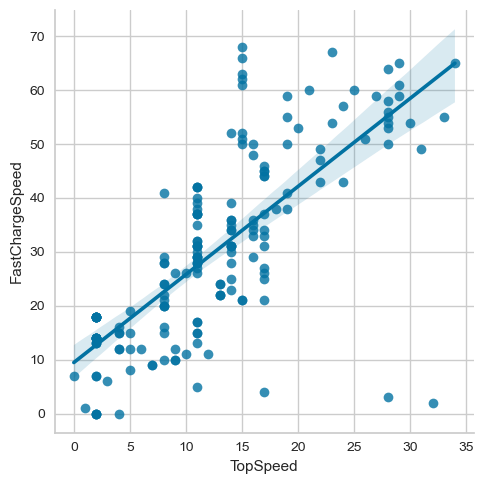

In [166]:
sns.lmplot(x='TopSpeed', y='FastChargeSpeed', data=df)

In [167]:
fig = px.bar(df,x = 'Range',y = 'Drive',text='Drive')
pio.show(fig)

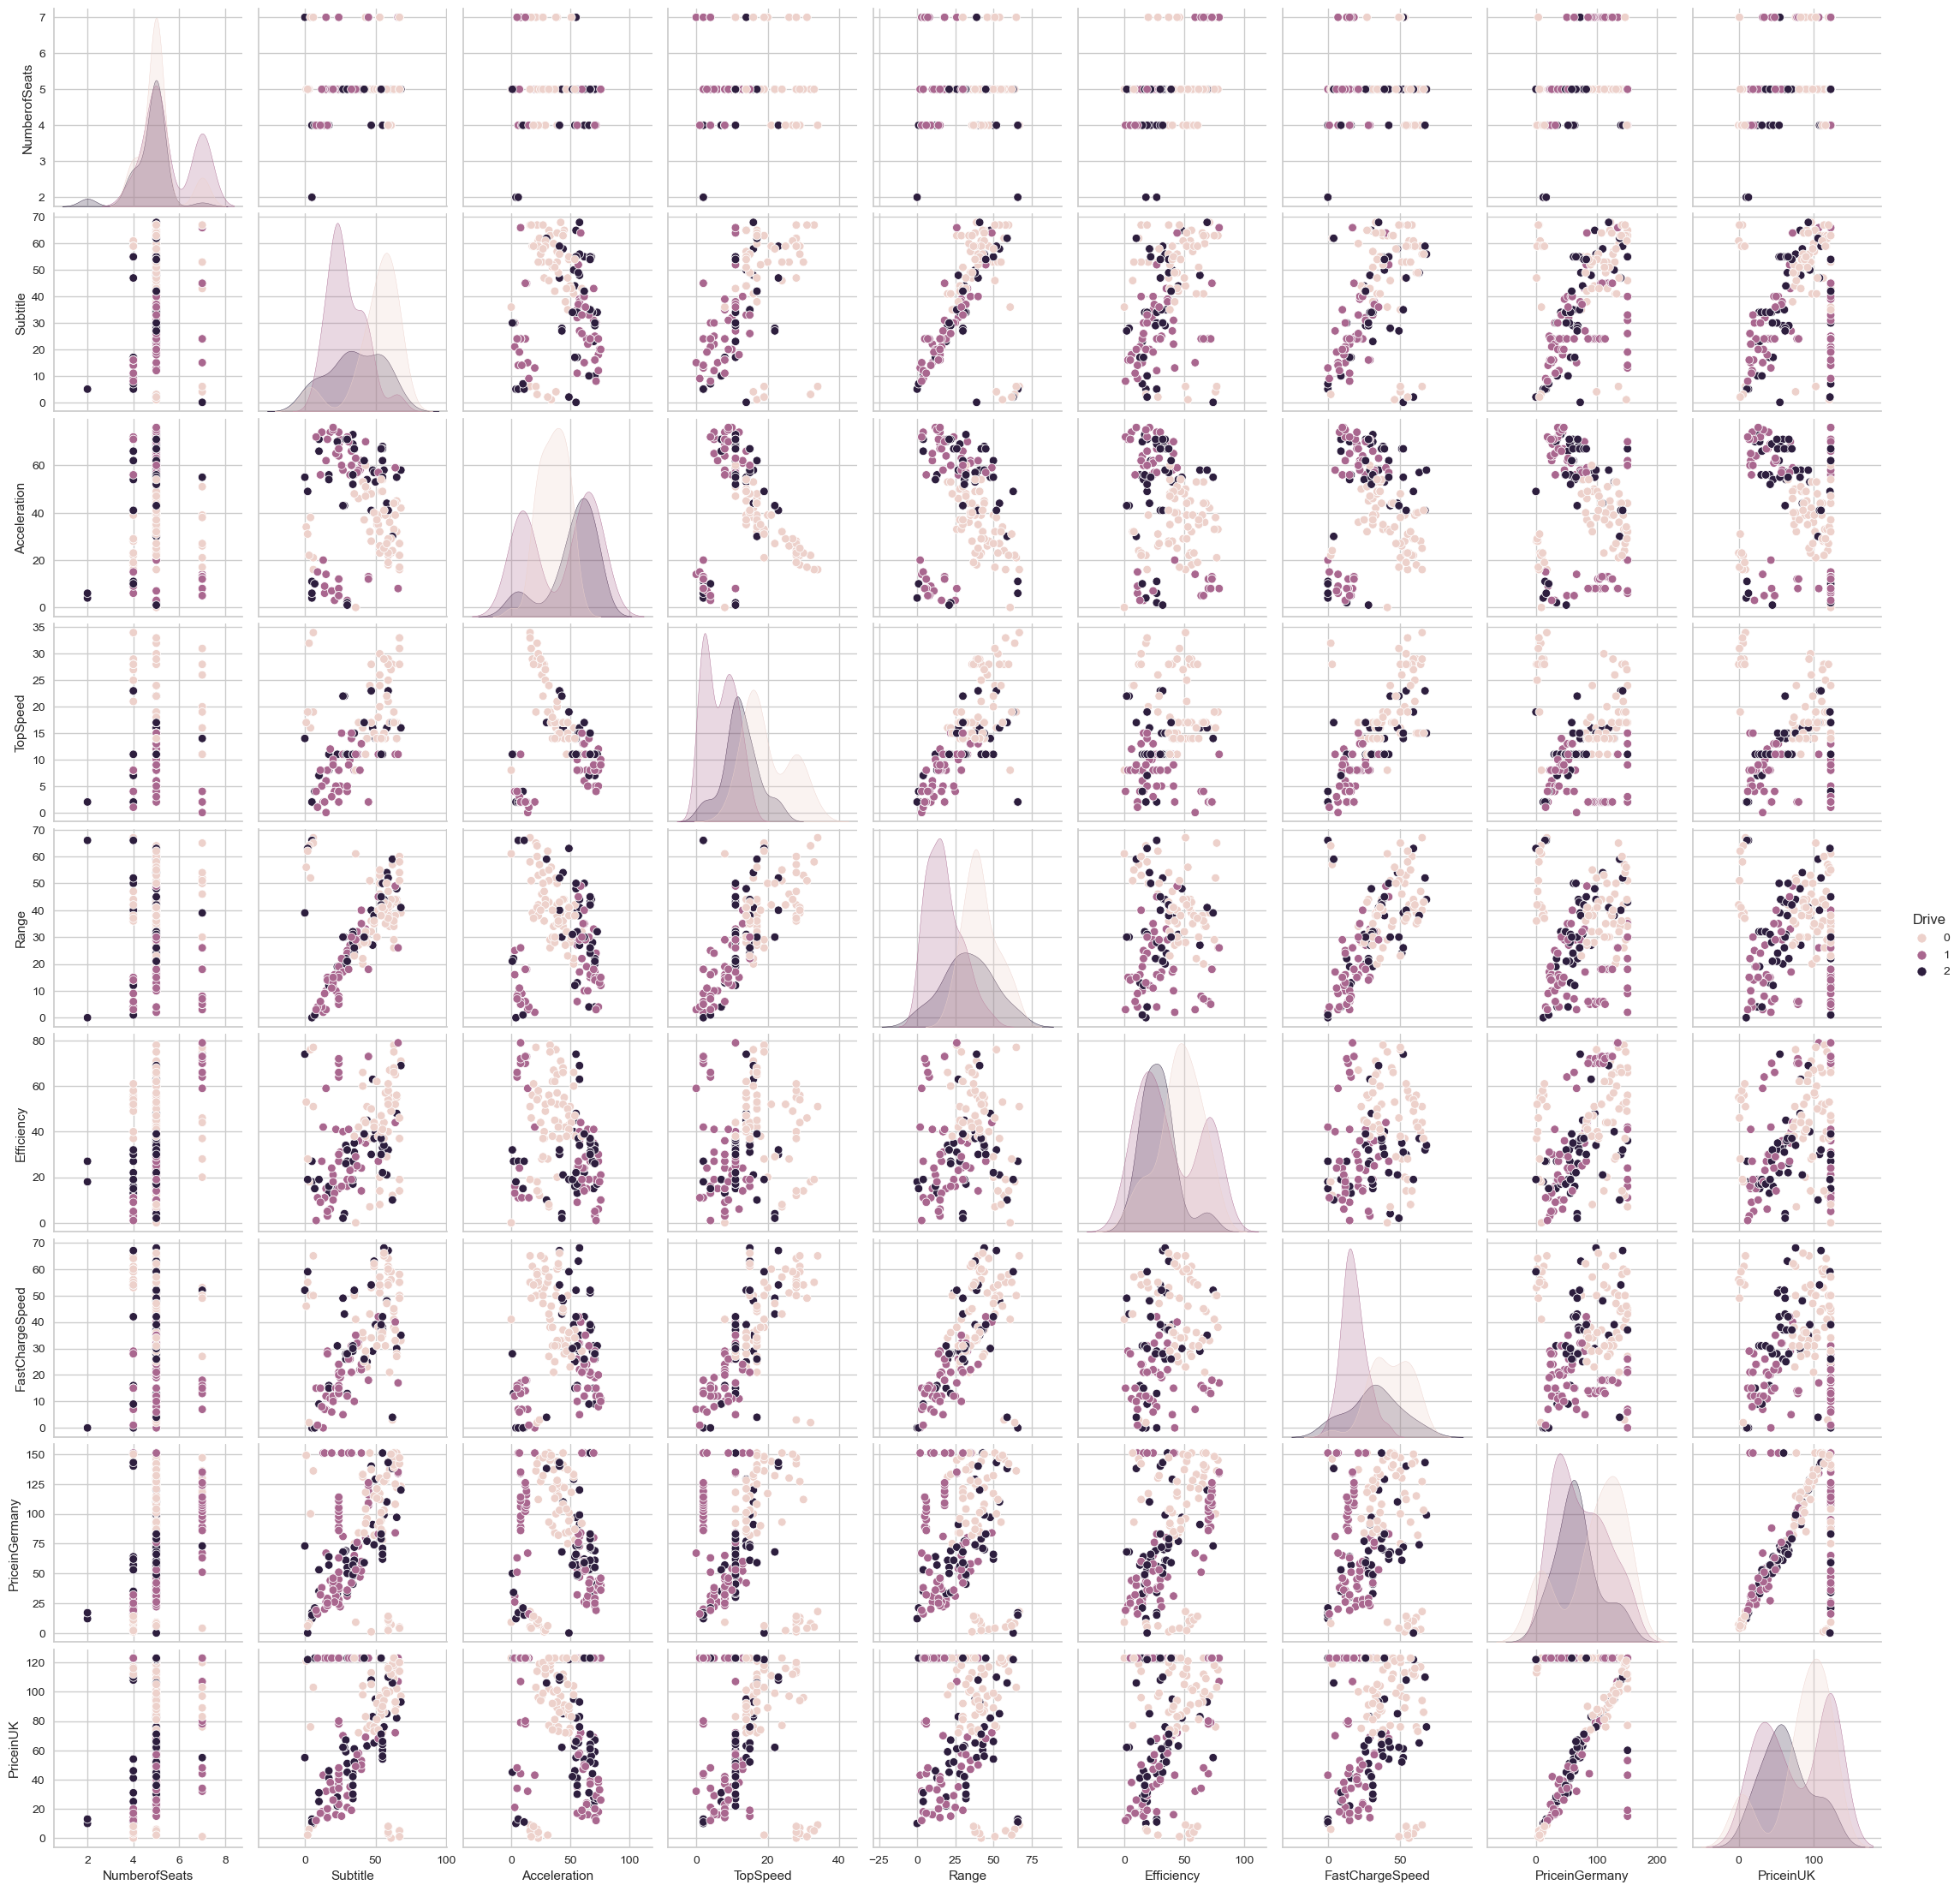

In [168]:
sns.pairplot(df,hue='Drive')

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

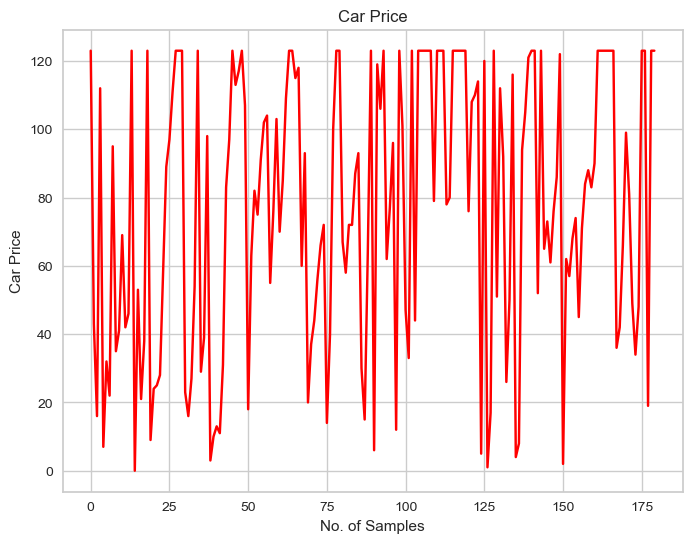

In [169]:
df['PriceinUK'].plot(figsize = (8,6),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

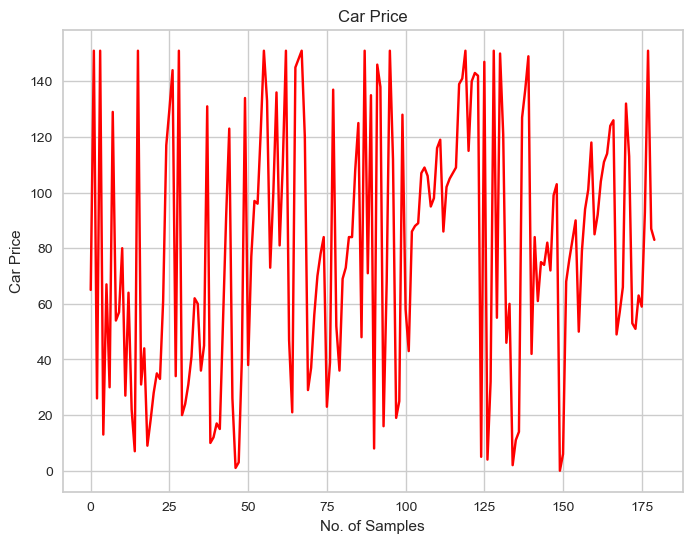

In [170]:
df['PriceinGermany'].plot(figsize = (8,6),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

Text(0.5, 1.0, 'No. of Seats')

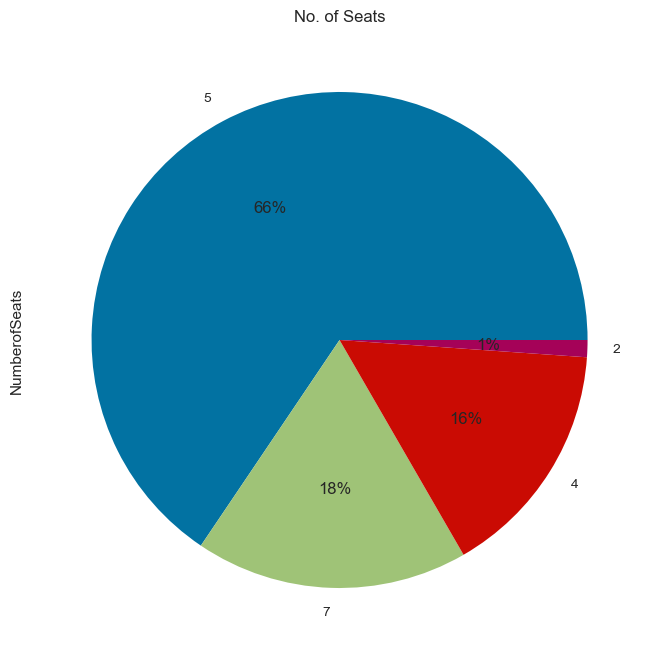

In [171]:
df['NumberofSeats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=None)
plt.title('No. of Seats')

Text(0.5, 1.0, 'Drive types')

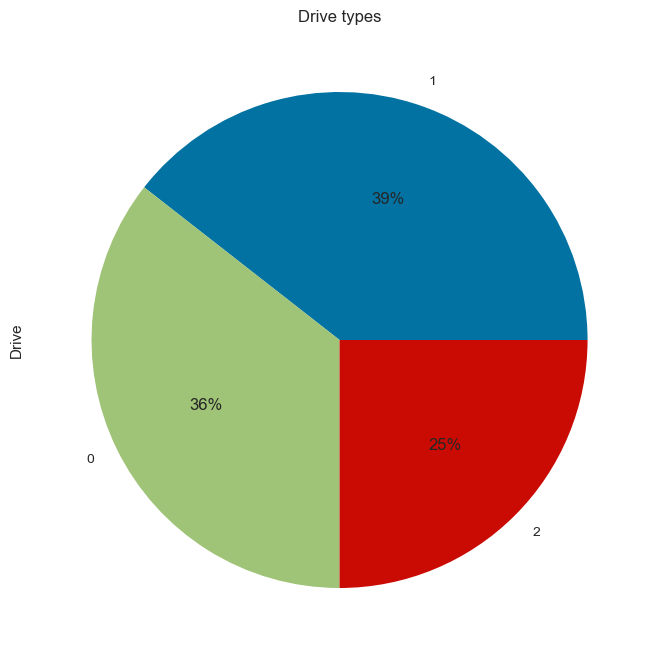

In [172]:
df['Drive'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=None)
plt.title('Drive types')

<Axes: xlabel='TopSpeed', ylabel='FastChargeSpeed'>

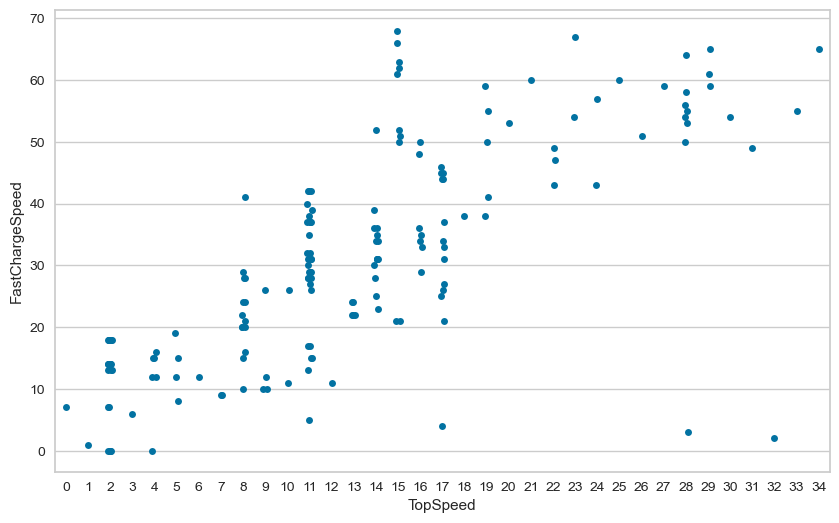

In [173]:
#Clustering
ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='TopSpeed', y='FastChargeSpeed', data=df, jitter=True)

<Axes: xlabel='TopSpeed', ylabel='Efficiency'>

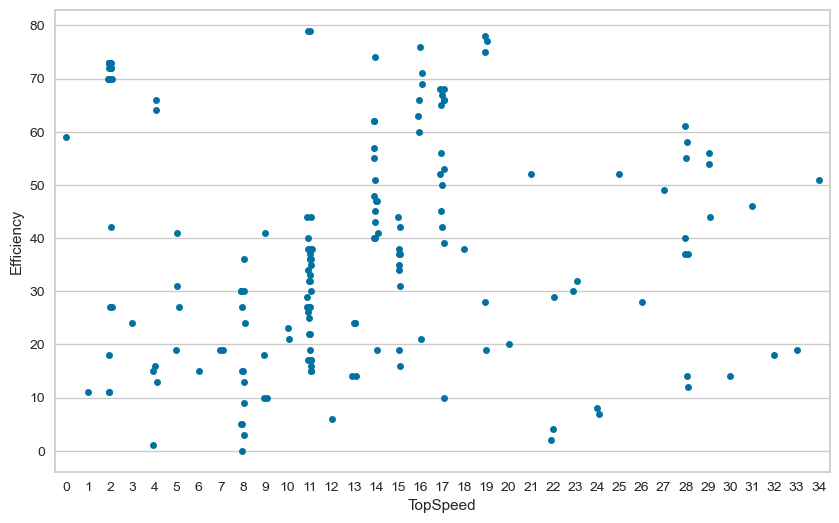

In [174]:
ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='TopSpeed', y='Efficiency', data=df, jitter=True)

In [175]:
features = ['Acceleration','TopSpeed','Efficiency','FastChargeSpeed','Drive',
            'Range', 'NumberofSeats', 'PriceinUK','PriceinGermany','Subtitle']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [177]:
pca = PCA(n_components=10)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9','PC10'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9,PC10
0,0.980378,0.237476,-0.885456,1.101980,-0.089985,-0.434019,0.227955,-0.706439,0.530508,0.284114
1,2.150866,1.933071,0.257116,0.468084,-0.620017,0.998208,-1.595311,1.056974,-0.448241,-0.175778
2,2.899335,-0.813078,0.508981,-0.326110,-0.976753,-0.253081,-0.285615,-0.313623,-0.196324,-0.146225
3,-2.608434,0.785995,-0.725343,0.096447,-0.821774,0.493175,0.091855,0.474755,0.196620,-0.120471
4,-2.123115,-2.196720,2.492856,-0.751447,-0.343895,1.265793,0.848716,0.155191,-0.412081,0.135911
...,...,...,...,...,...,...,...,...,...,...
175,0.308273,-0.328930,-1.312408,0.049536,0.754613,-0.161947,0.973424,-0.159002,0.172865,1.139849
176,-2.599705,-1.317871,-0.039267,1.334814,0.481297,-1.073170,-0.101985,-0.369861,-0.610981,-0.391788
177,0.456323,-0.685549,-0.780645,-0.426927,-0.649206,0.248649,-2.055368,0.378614,-0.471869,0.055826
178,-1.412024,0.173043,-0.513452,0.629637,-0.774059,-0.252602,0.553096,-0.401009,0.618148,-0.054693


In [178]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data2.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
PC1,0.130813,-0.325754,-0.606383,-0.314280,-0.481306,-0.289945,0.095662,-0.029750,0.264002,0.121833
PC2,-0.408515,-0.336627,0.145908,-0.013000,-0.005957,-0.078138,-0.070526,0.079248,-0.308652,0.765296
PC3,-0.231961,0.429593,0.162152,-0.406676,-0.108074,0.291568,0.293953,0.321172,0.474732,0.241544
PC4,-0.411179,-0.261768,0.013148,-0.262547,0.126011,-0.228121,0.368873,0.413189,-0.284556,-0.487465
Pc5,0.349034,-0.065964,-0.396976,-0.295260,0.709536,0.215707,0.098951,0.118836,-0.106297,0.209459
PC6,-0.382445,-0.292211,0.017022,0.020719,0.426493,-0.159626,-0.331449,-0.152440,0.645402,-0.103016
PC7,-0.066860,0.469776,0.069349,-0.483404,0.127507,-0.559905,-0.146272,-0.381610,-0.194706,0.040850
PC8,-0.212145,0.341386,-0.367359,0.575191,0.171044,-0.323901,0.453175,-0.004987,0.084228,0.161240
PC9,-0.288429,0.316942,-0.458455,0.049280,-0.084177,0.125376,-0.622155,0.398688,-0.168502,-0.080740


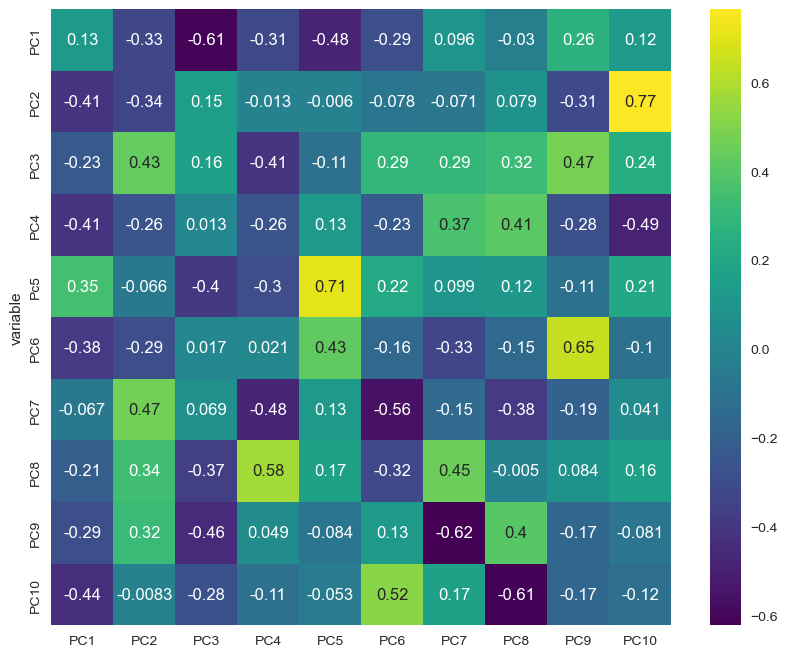

In [179]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.show()

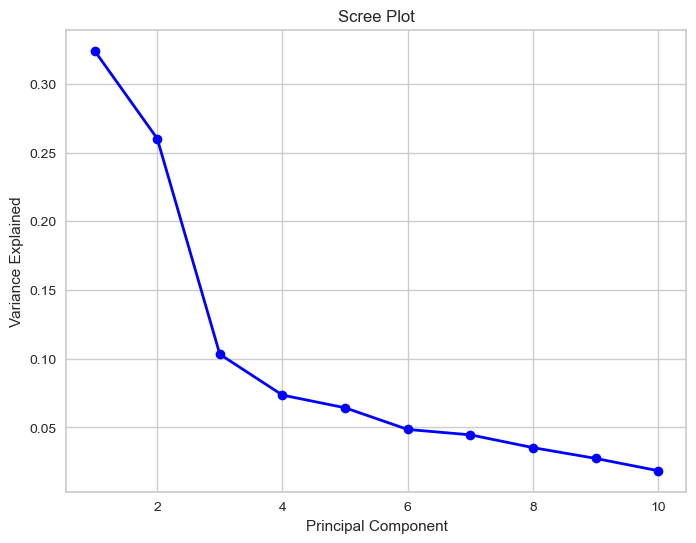

In [180]:
plt.rcParams['figure.figsize'] = (8,6)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [181]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


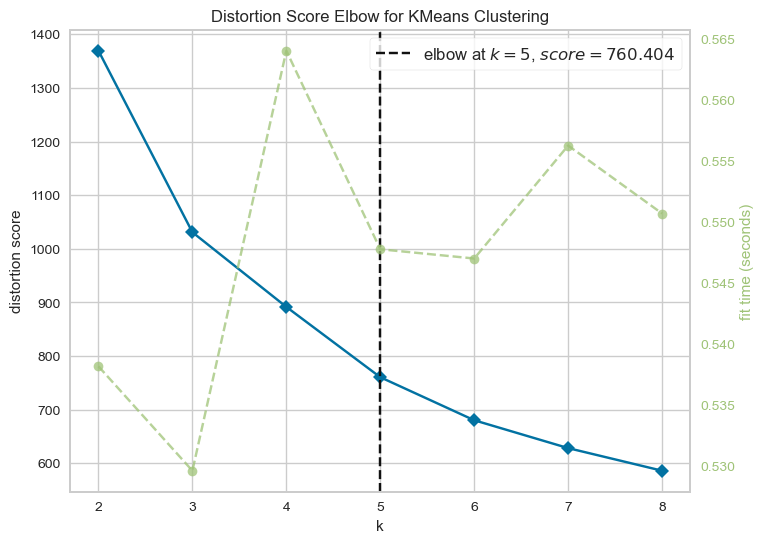

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [182]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

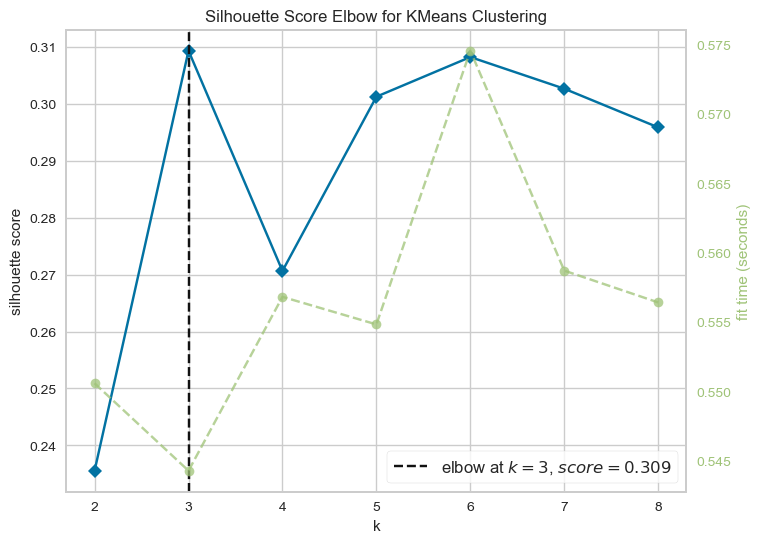

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [183]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

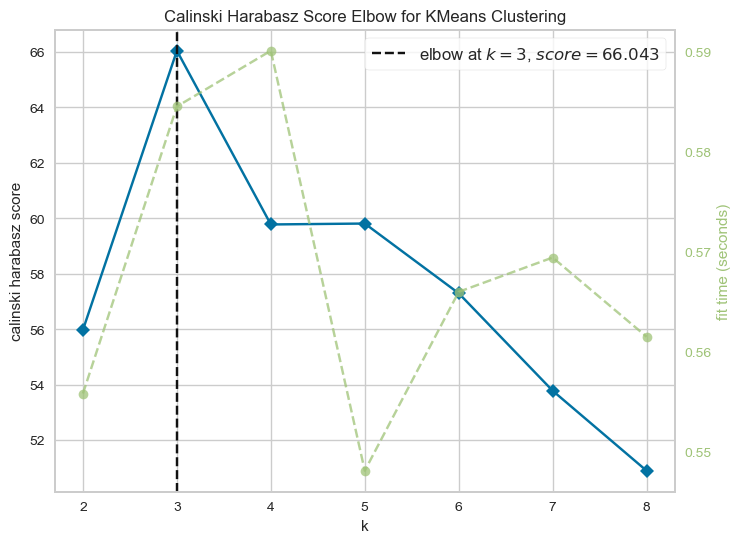

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [184]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()

In [185]:
#K-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ 

In [186]:
print (kmeans.labels_) #Label assigned for each data point

[3 1 3 2 2 1 3 0 3 3 0 3 3 3 2 0 3 3 2 2 3 3 3 0 2 2 2 3 3 3 3 3 0 0 0 3 3
 2 2 3 3 3 3 0 2 3 2 2 3 1 3 0 0 2 2 2 2 0 2 2 3 0 2 0 3 2 2 0 0 3 3 0 0 2
 2 3 3 2 0 3 0 0 0 2 2 2 0 0 0 1 3 2 0 3 0 2 2 3 3 2 0 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 0 2 0 0 2 2 2 2 3 1 0 2 2 3 0 2 2 2 2 2 2 0 2 0 2 0 2 0 0
 2 0 2 0 0 0 2 3 0 2 2 2 2 2 2 1 1 1 1 0 0 0 2 2 0 1 1 0 2 0 2 0]


In [188]:
print (kmeans.inertia_) #gives within-cluster sum of squares

891.5393628014904


In [189]:
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares

6


In [190]:
print(kmeans.cluster_centers_)

[[ 0.17559646 -0.83388378 -0.94521032 -0.44413459  0.53561543 -0.00866971
   0.01213468  0.01916927  0.02292559  0.04089249]
 [ 0.60427321  3.24491705  0.5134321  -0.34235558  0.3204547   0.07376868
   0.02421007 -0.0641779  -0.15387248 -0.05551281]
 [-1.91589487 -0.24337735  0.37937097  0.22017311 -0.38993357 -0.03359971
  -0.00898619  0.04496716  0.04213822 -0.03783496]
 [ 2.29490589 -0.67082774  0.21584999  0.39983176 -0.23836103  0.0148479
  -0.01566503 -0.05008571  0.00530055  0.04340962]]


In [191]:
from collections import Counter
#To see each cluster size
Counter(kmeans.labels_)


Counter({3: 42, 1: 26, 2: 63, 0: 49})

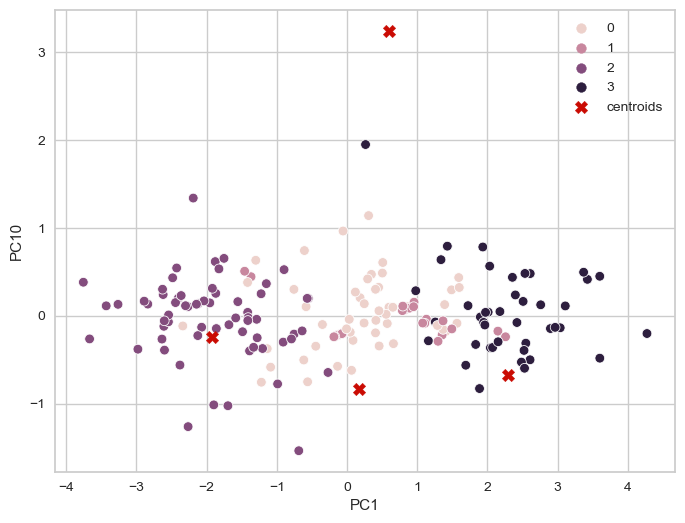

In [192]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC10", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [193]:
#Linear Regression with PCA
from sklearn.linear_model import LinearRegression
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9','PC10']]
y=df['PriceinUK']

In [126]:
data2.isna().sum()

PC1     0
PC2     0
PC3     0
PC4     0
Pc5     0
PC6     0
PC7     0
PC8     0
PC9     0
PC10    0
dtype: int64

In [127]:
df.fillna(-99999, inplace=True)

In [194]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [195]:
# Create a linear regression model object
model_2 = LinearRegression()

In [196]:
model_2.fit(x_train, y_train)

LinearRegression()

In [197]:
# Predict the output variable using the test set
y_pred = model_2.predict(x_test)


In [198]:
# Predict the output variable using the test set
y_pred = model_2.predict(x_test)

In [199]:
y_pred

array([  9.,  31.,  68., 123.,  73.,  53.,  89.,  93.,  78., 123., 123.,
        83.,  20.,  52., 123.,  21.,  63., 120.,  96., 104.,  12.,  76.,
       123.,  23.,  41.,  49.,  70., 123.,  86.,  34.,  79., 102., 123.,
         1., 118., 123.])

In [209]:
# Evaluate the model's performance using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.765646008308007e-27


In [203]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


In [204]:
predictions=model_2.predict(x_test)
predictions

array([  9.,  31.,  68., 123.,  73.,  53.,  89.,  93.,  78., 123., 123.,
        83.,  20.,  52., 123.,  21.,  63., 120.,  96., 104.,  12.,  76.,
       123.,  23.,  41.,  49.,  70., 123.,  86.,  34.,  79., 102., 123.,
         1., 118., 123.])

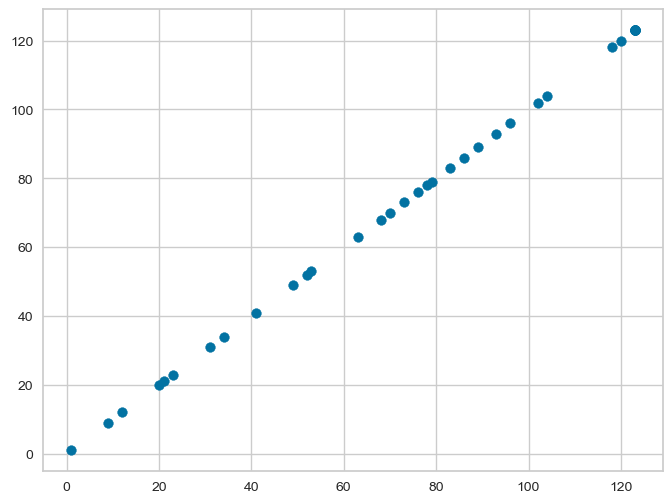

In [205]:
plt.scatter(y_test, predictions)

<Axes: xlabel='PriceinUK', ylabel='Density'>

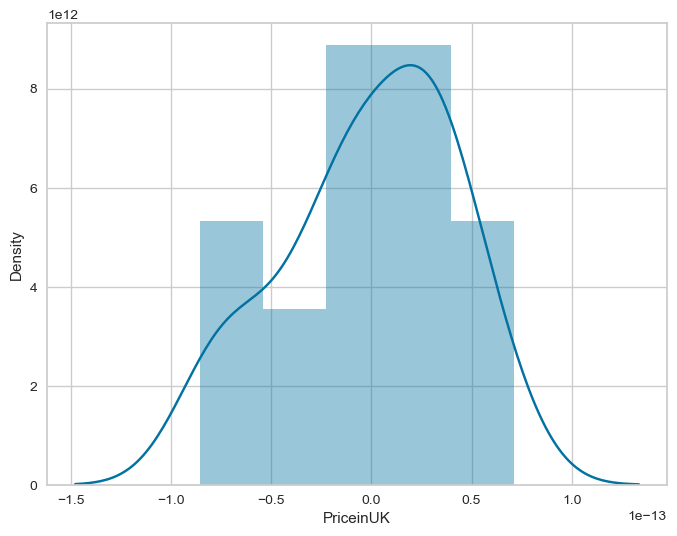

In [206]:
#Residual histogram plot
sns.distplot((y_test-predictions))

In [214]:
from sklearn.metrics import mean_absolute_error as MAE
import sklearn.metrics as metrics

  
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 3.4145525912915924e-14
MSE: 1.765646008308007e-27
RMSE: 4.201959076797401e-14
